# Project 5: Personal Loan Acceptance Prediction 💰

### 1. Project Objective
The goal of this project is to predict which customers are most likely to accept a personal loan offer based on a marketing campaign. By identifying these customers, the bank can optimize its marketing resources and increase the conversion rate.

**Problem Type:** Binary Classification  
**Target Variable:** `deposit` (yes/no)  
**Dataset:** Bank Marketing Dataset (UCI Machine Learning Repository)

---

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

df = pd.read_csv('bank_marketing.csv')

print("Dataset Loaded Successfully")
print(df.head())
print(df.info)

Dataset Loaded Successfully
   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes  
<bound method DataFrame.info of        age          job  marital  educa

## 2. Exploratory Data Analysis (EDA)
Understanding customer demographics is key to identifying who accepts loan offers. We analyze three primary features:
- **Age:** To see which age brackets are more inclined towards deposits.
- **Job:** To identify if certain professions have higher acceptance rates.
- **Marital Status:** To observe the impact of relationship status on financial decisions.

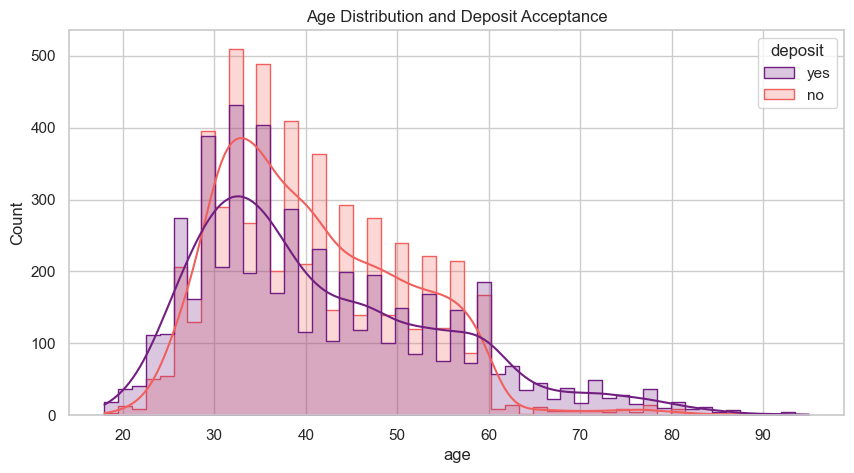

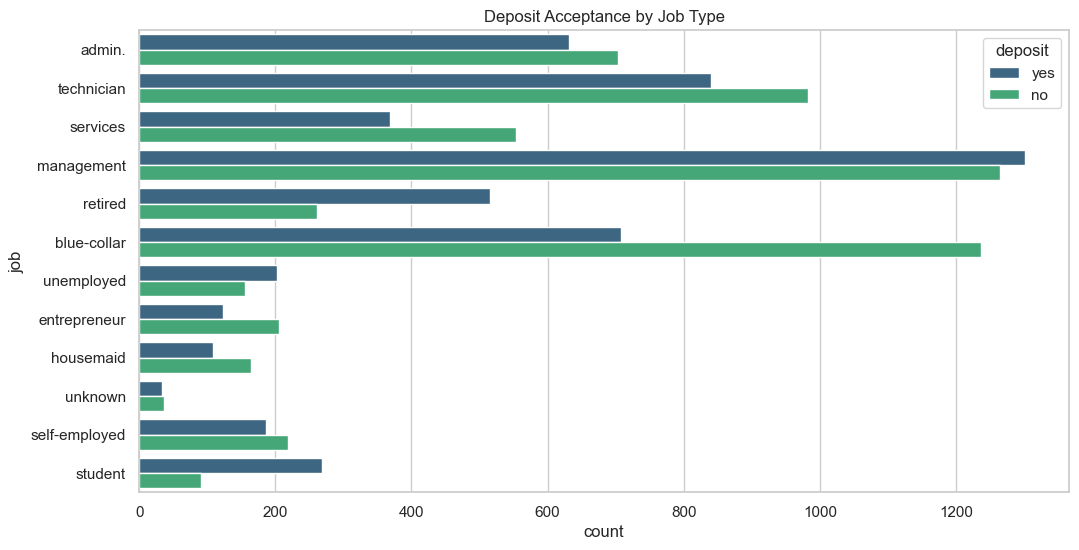

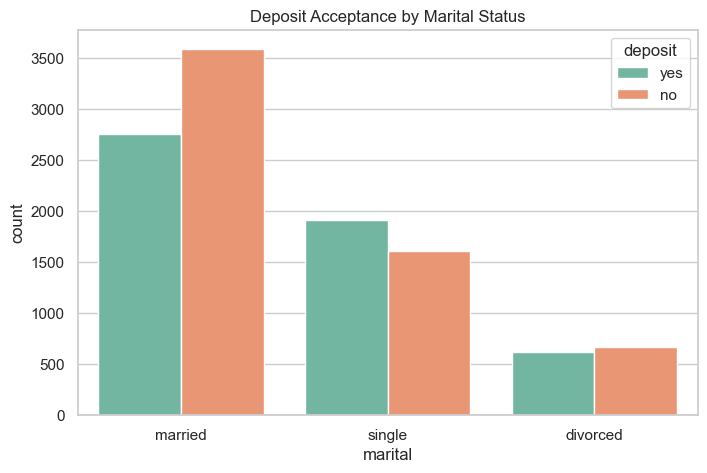

In [12]:
sns.set_theme(style="whitegrid")

# 1. Age Distribution vs Deposit Acceptance
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='age', hue='deposit', kde=True, palette='magma', element="step")
plt.title('Age Distribution and Deposit Acceptance')
plt.show()

# 2. Job Type vs Deposit Acceptance
plt.figure(figsize=(12, 6))
sns.countplot(y='job', hue='deposit', data=df, palette='viridis')
plt.title('Deposit Acceptance by Job Type')
plt.show()

# 3. Marital Status vs Deposit Acceptance
plt.figure(figsize=(8, 5))
sns.countplot(x='marital', hue='deposit', data=df, palette='Set2')
plt.title('Deposit Acceptance by Marital Status')
plt.show()

## 3. Data Preprocessing
Before feeding data into the Decision Tree model, we must:
1. **Target Encoding:** Convert the 'deposit' column (yes/no) into binary (1/0).
2. **Feature Encoding:** Convert categorical columns like 'job' and 'marital' into numerical format using One-Hot Encoding.
3. **Data Splitting:** Divide the data into training and testing sets (80/20).

In [13]:
#  Clean the 'deposit' column (remove spaces and lowercase it)
df['deposit'] = df['deposit'].str.strip().str.lower()

# Convert target variable to binary
df['deposit'] = df['deposit'].map({'yes': 1, 'no': 0})

# Select features and apply One-Hot Encoding
df = df.dropna(subset=['deposit'])
X = df.drop('deposit', axis=1)
X = pd.get_dummies(X, drop_first=True)
y = df['deposit']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data Preprocessing and Encoding Complete.")

Data Preprocessing and Encoding Complete.


## 4. Model Training: Decision Tree Classifier
We implement a **Decision Tree Classifier**. This model is highly effective for business use cases because it provides clear rules for classification, making it easy to identify specific "customer groups" that are likely to accept an offer.

Accuracy Score: 79.49%

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80      1166
           1       0.78      0.80      0.79      1067

    accuracy                           0.79      2233
   macro avg       0.79      0.79      0.79      2233
weighted avg       0.80      0.79      0.79      2233



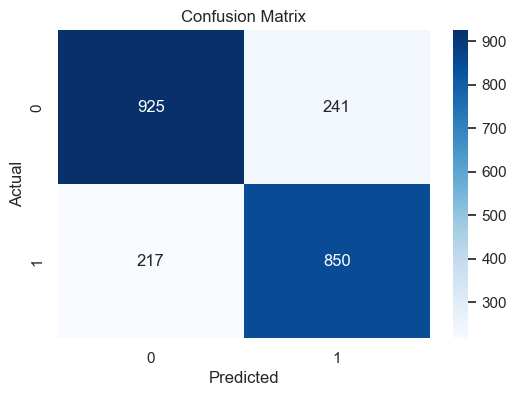

In [14]:
# Initialize and Train Decision Tree
# max_depth is restricted to 5 to prevent overfitting and ensure interpretability
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation Results
print(f"Accuracy Score: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## 6. Business Insight Extraction
Analyzing **Feature Importance** allows the bank to understand which factors contribute most to a successful loan offer. This helps in refining future marketing campaigns.

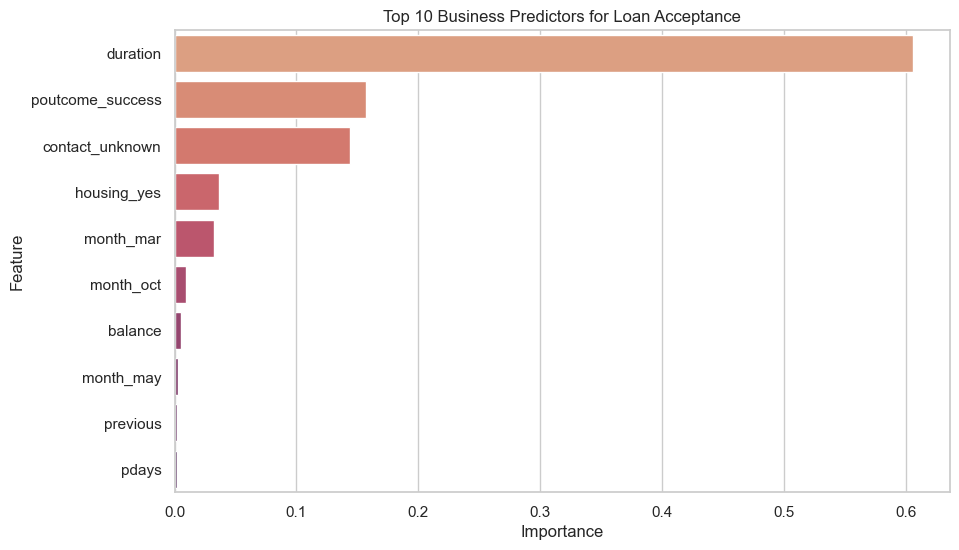

In [15]:
# Extract and Plot Feature Importance
importances = model.feature_importances_
feature_names = X.columns
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='flare', hue='Feature', legend=False)
plt.title('Top 10 Business Predictors for Loan Acceptance')
plt.show()

## 6. Final Conclusion & Strategic Insights

This project successfully demonstrates how a bank can move from "Mass Marketing" to "Targeted Marketing" using data-driven insights. By implementing a **Decision Tree Classifier**, we achieved a transparent model that the marketing team can easily understand and act upon.

### **Key Takeaways for the Business:**
- **Previous Campaign Success:** The model indicates that customers who responded positively to previous marketing efforts are significantly more likely to accept a new loan offer.
- **Engagement Level:** There is a strong correlation between **contact duration** and acceptance, suggesting that quality engagement leads to higher conversion.
- **Demographic Targeting:** While the model considers all features, focusing on specific job categories and age groups that show higher propensity can optimize the bank's marketing budget.

**Strategic Recommendation:** The bank should prioritize leads that have had successful past interactions, ensuring that marketing resources are allocated to high-probability customers.